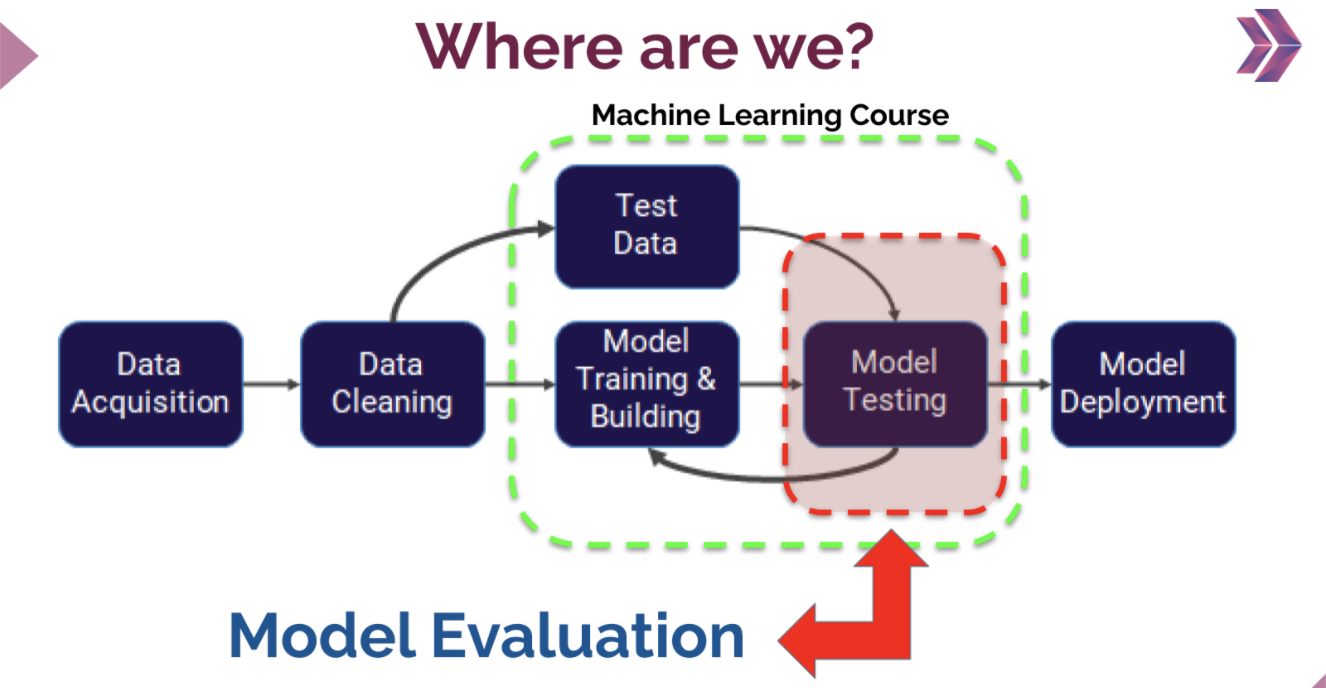

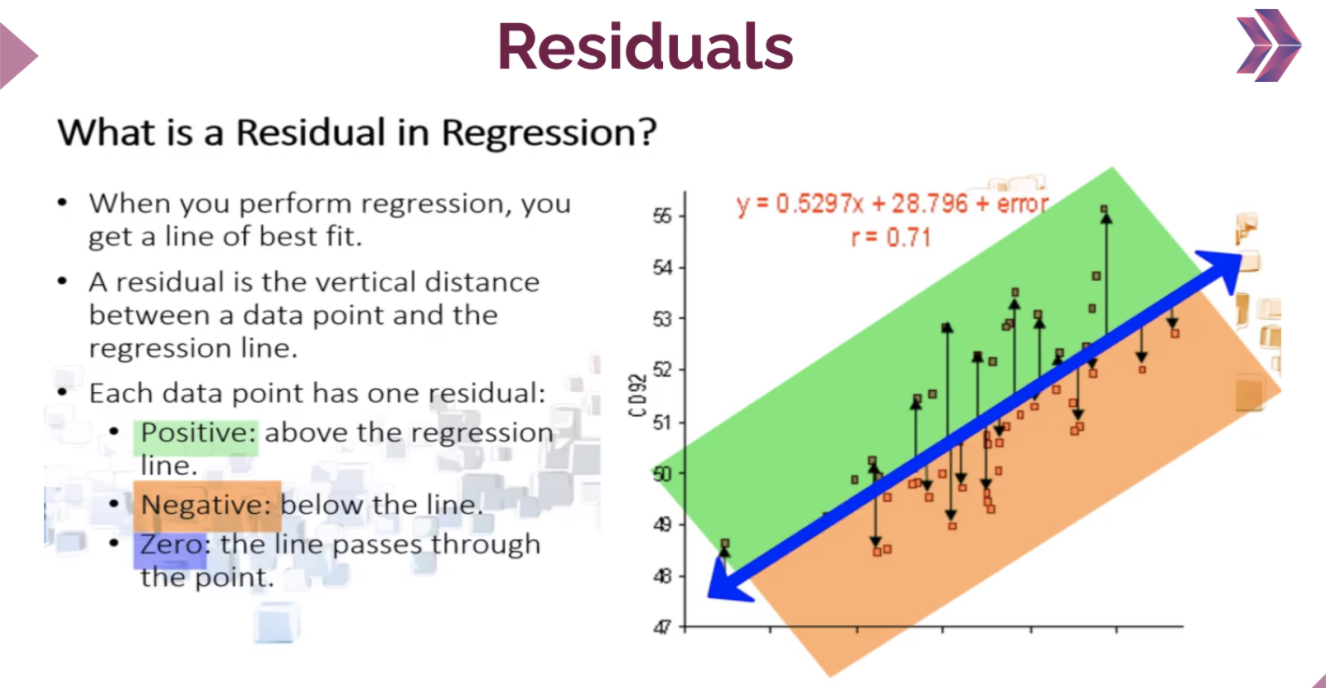

Buldugumuz tahmn ile gercek değer arasındaki faktır.

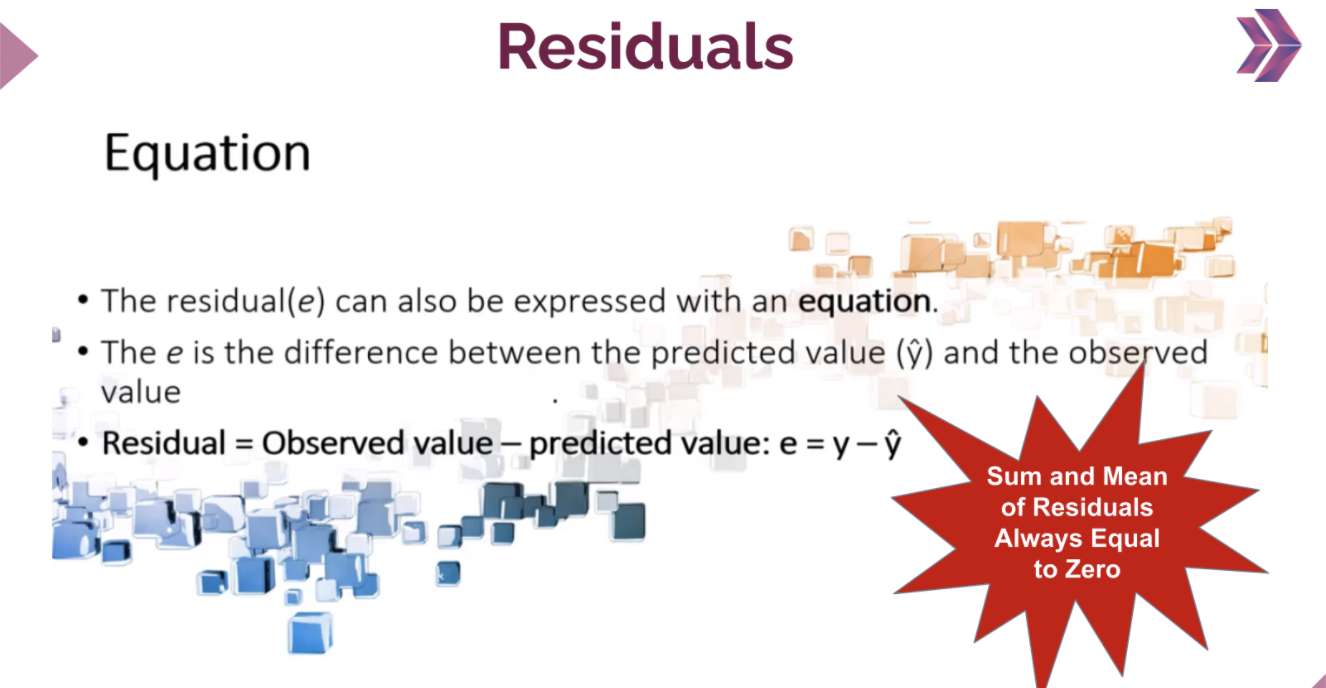

Error ların yada resudulların toplamı sıfırsa best fitline dır ve ort da sıfırdır.

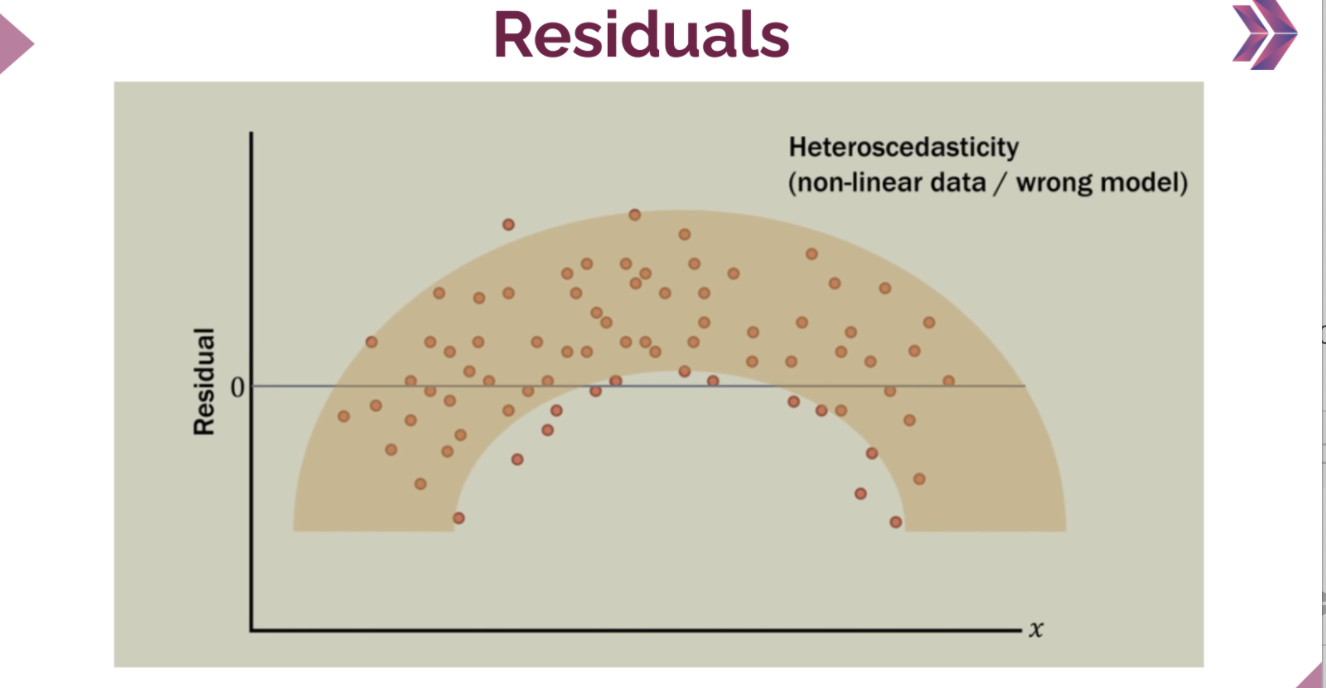

Bu data linear regg uygun değil. Dağılım parabolik.

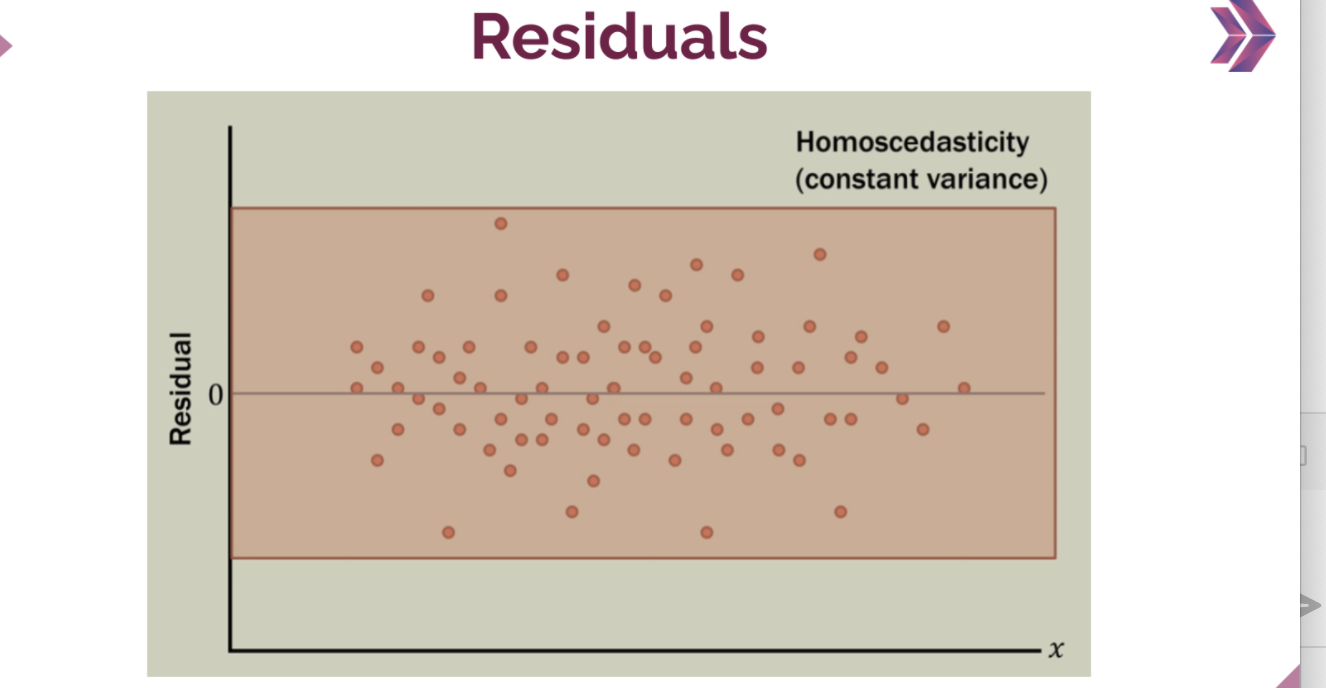

Linear regg uygundur. Eşit dağılım vardır.

Pattern göstermicek ve normal dağılıma uyucak.

x’in kucuk oldugu yerlerde modelin tahmin gucu dusuk, yuksek oldugu yerlerde modelin tahmin gucu yuksektir.

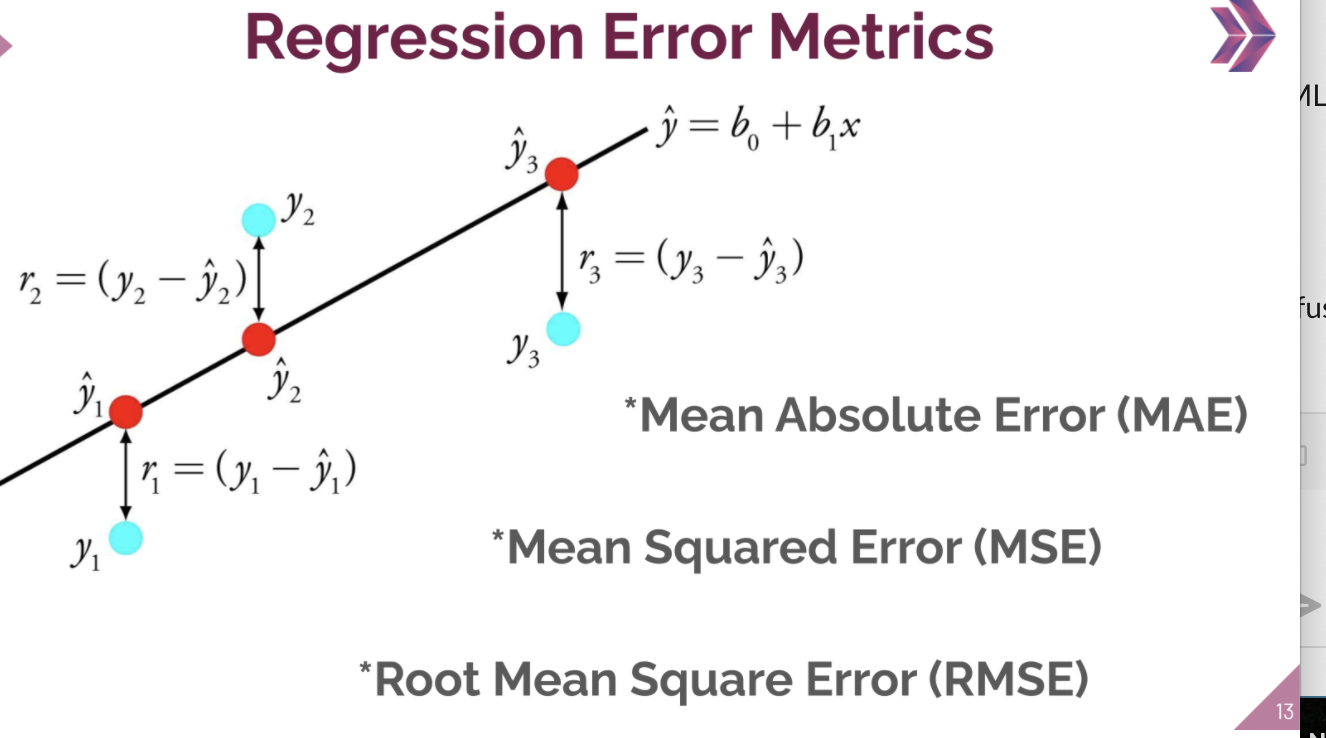

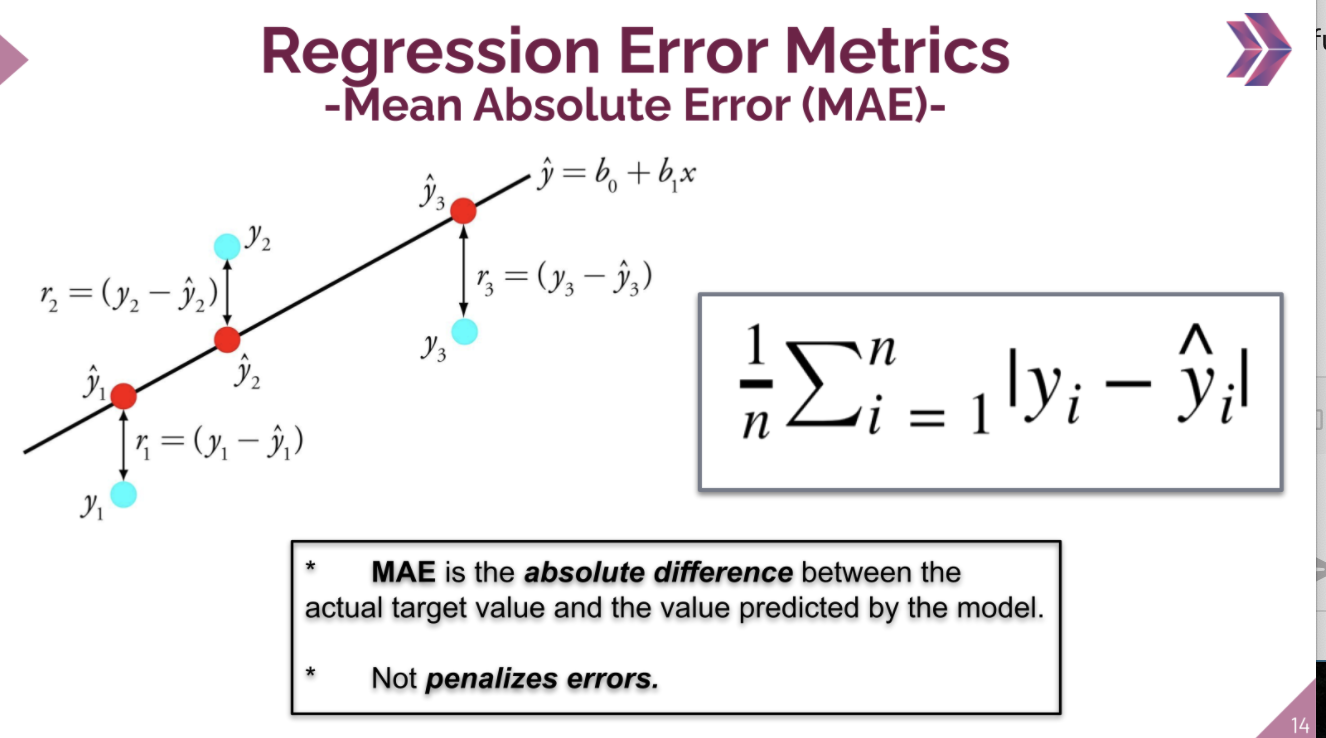

Çok fazla outlier varsa hatalrı cezalandıramıyor bu yüzden mse kullanırız.

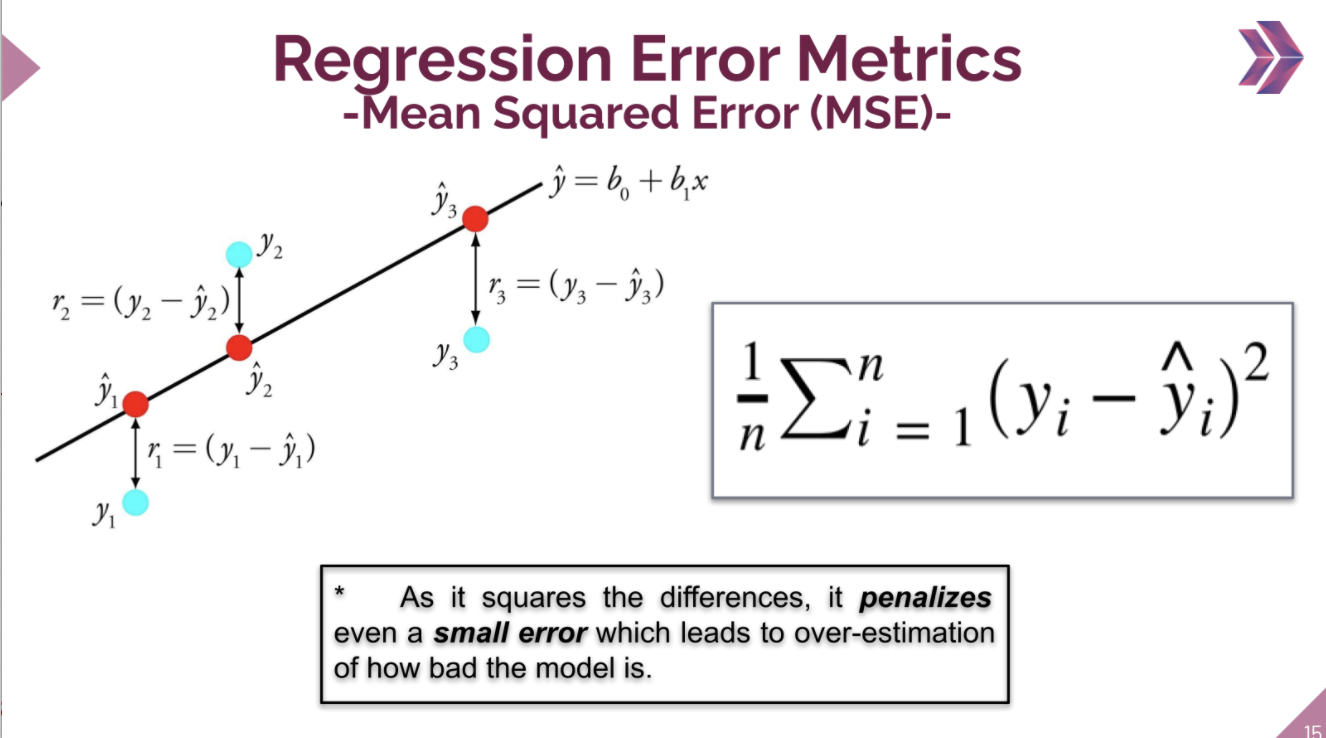

BU hatanın varyansı olarak düşün target km , km2 oluyor acıklamak zor.

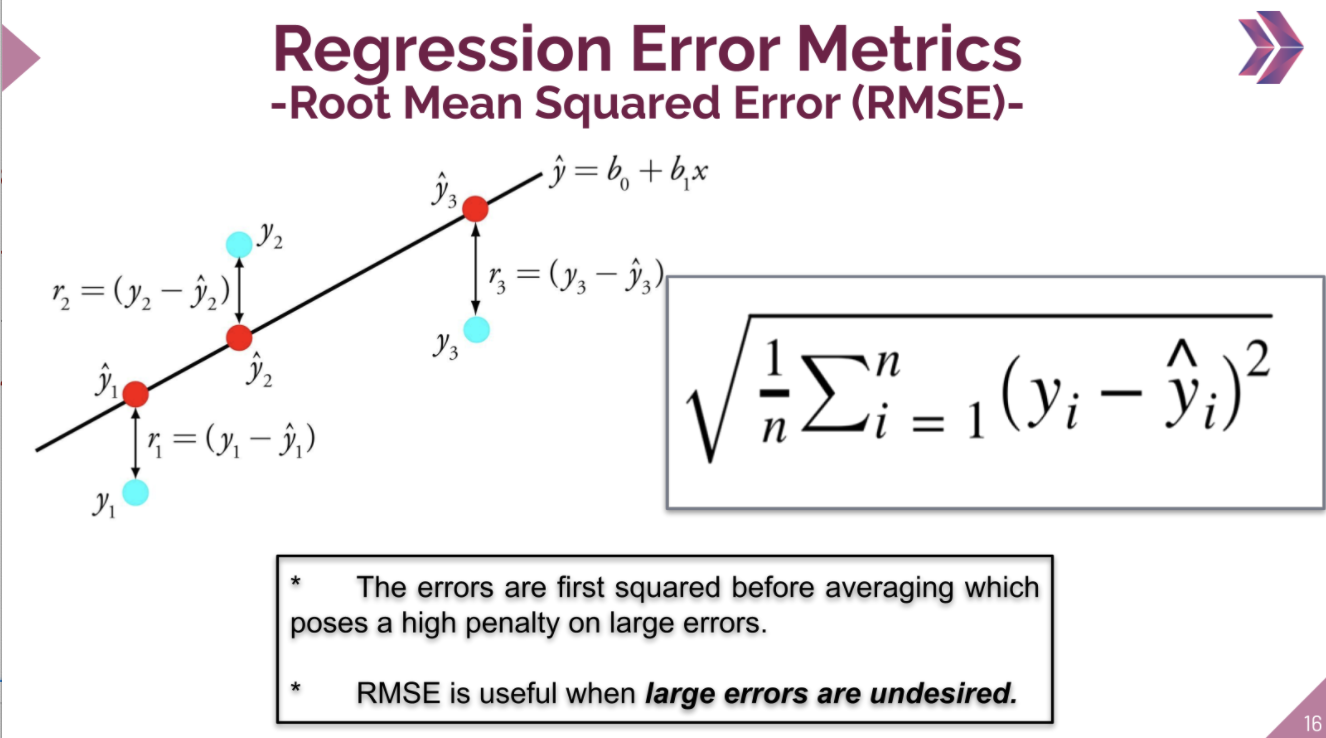

Önce metrik seçimi yapılmalı. interpret etmesi kolay.

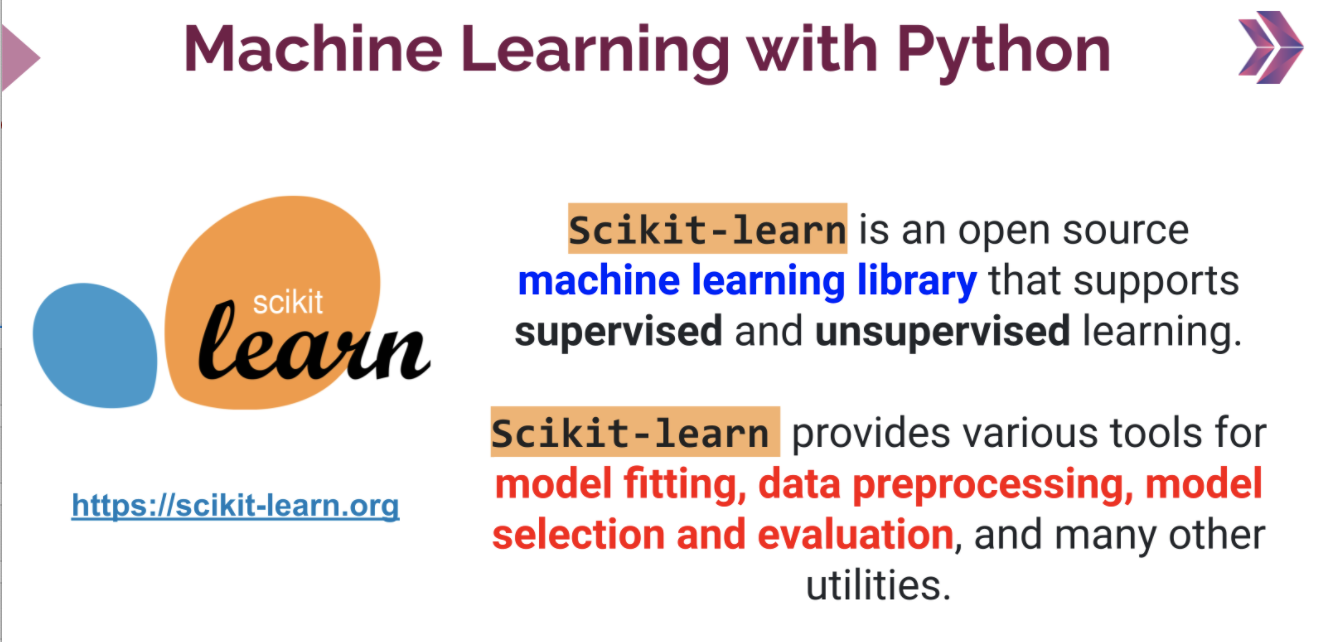

https://scikit-learn.org 

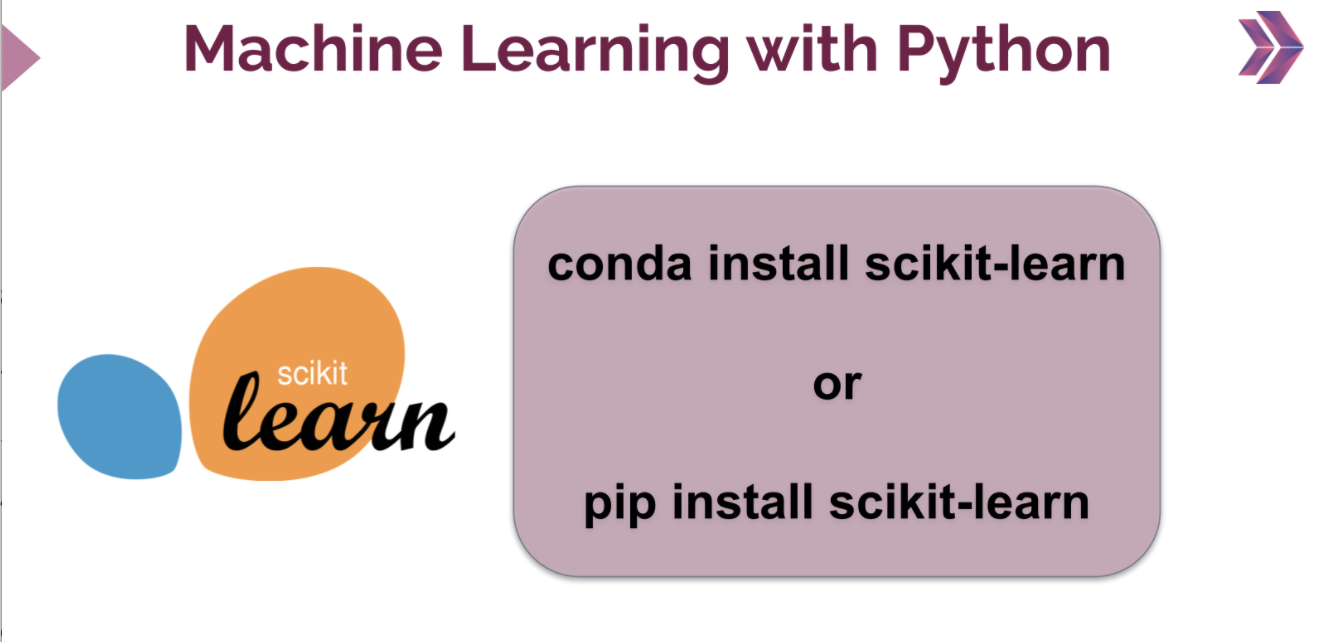

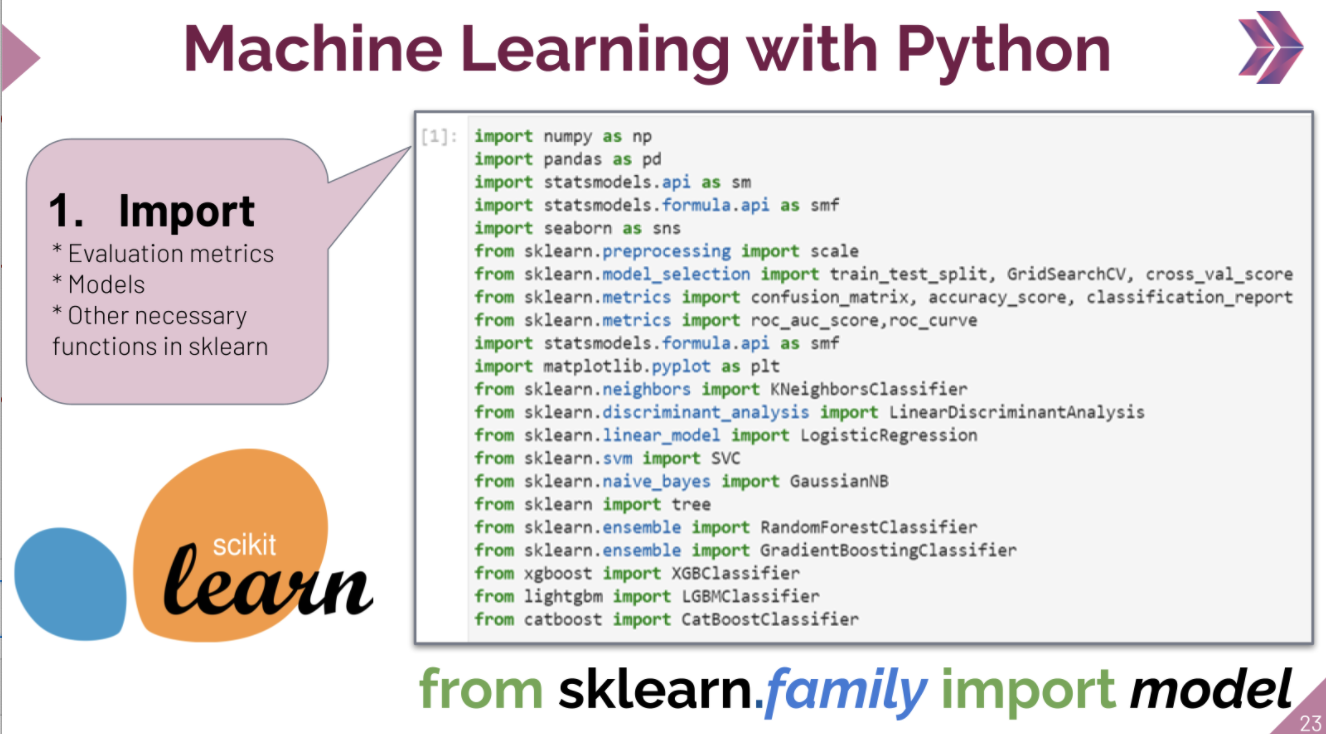

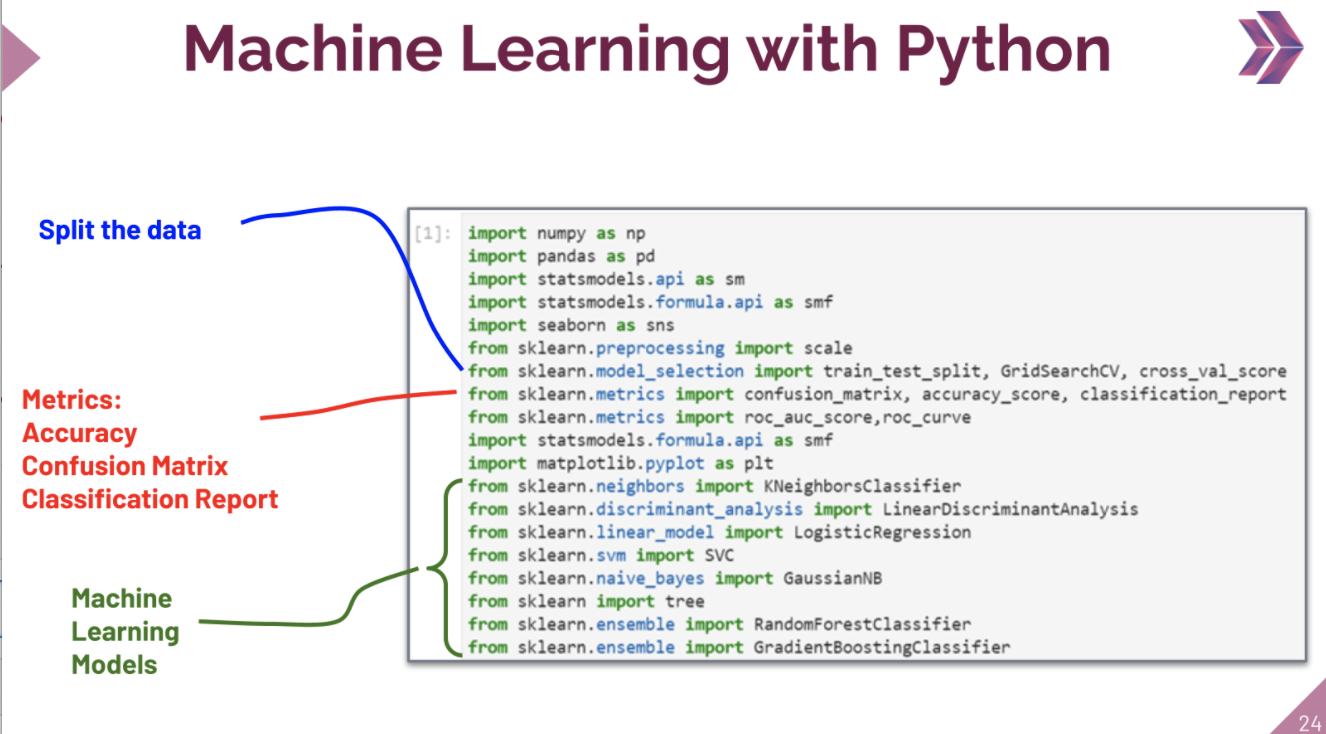

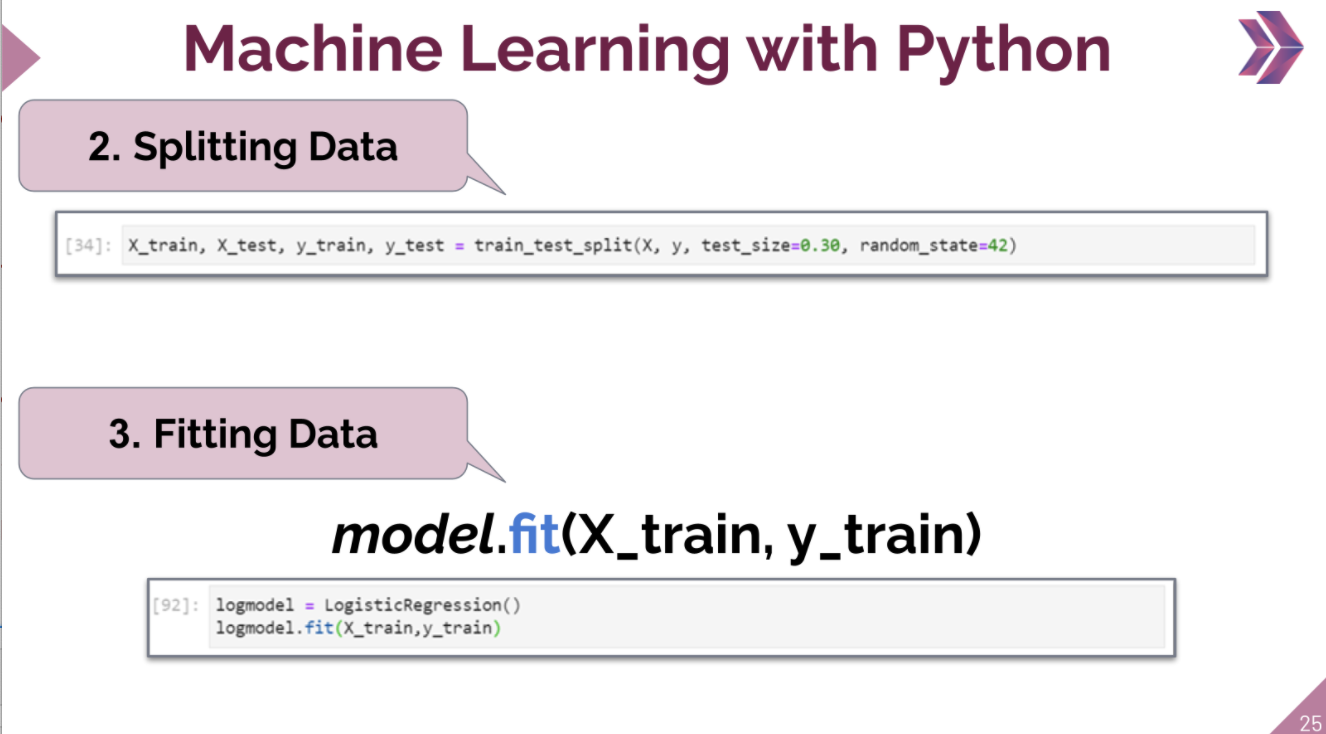

Önce datayı split ediyoruz. Datayı öğretmek için fit yapıyoruz.

fit'in gerçek dünya karşılığı dayak .d..d.d.d.

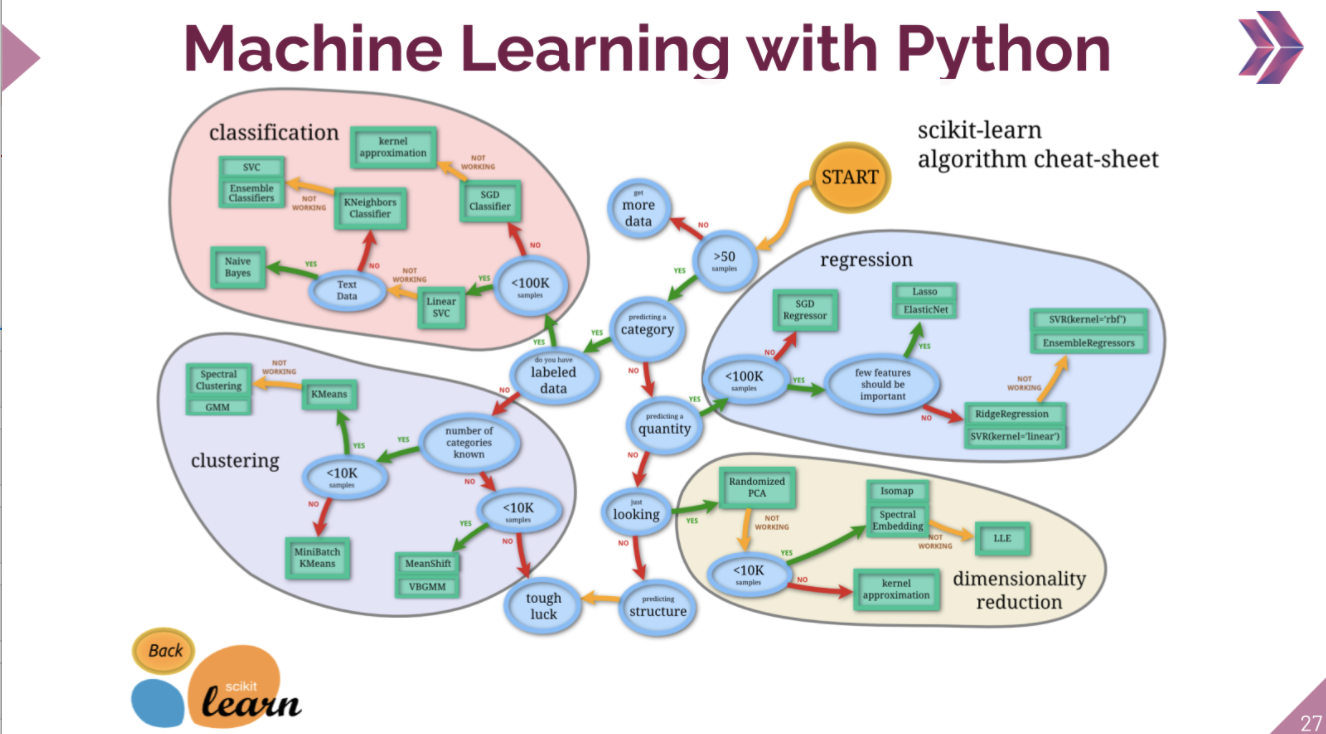



## Multiple Linear Regression and Regression Error Metrics

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

# supervised modeli

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

## Data Preparation

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [6]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115])) 

111.25
7.39509972887452


In [7]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700])) # mean std yakınlasması ouitlier sorununa işaret olabilir.

257.5
255.57533136044253


In [8]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

# Mean ile median arasindaki iliskiye de bakilabilir. 
# Skew var mi yok mu, varsa ne tarafa var bu iliskiden anlasilabilir.
#std sapma meanden büyük ise orada outlier değerler vardır.
#1. ve 3. çeyrek arasında uçurum değerler varsa buraya dikkat etmek lazım.

307.5
342.153109002388


std meanden büyükse outlier sorunu olabilir,

25 ile min veya 75 ile max. arasında ciddi bir fark varsa outlier üzerinde durulmalı.

## Distribution of features

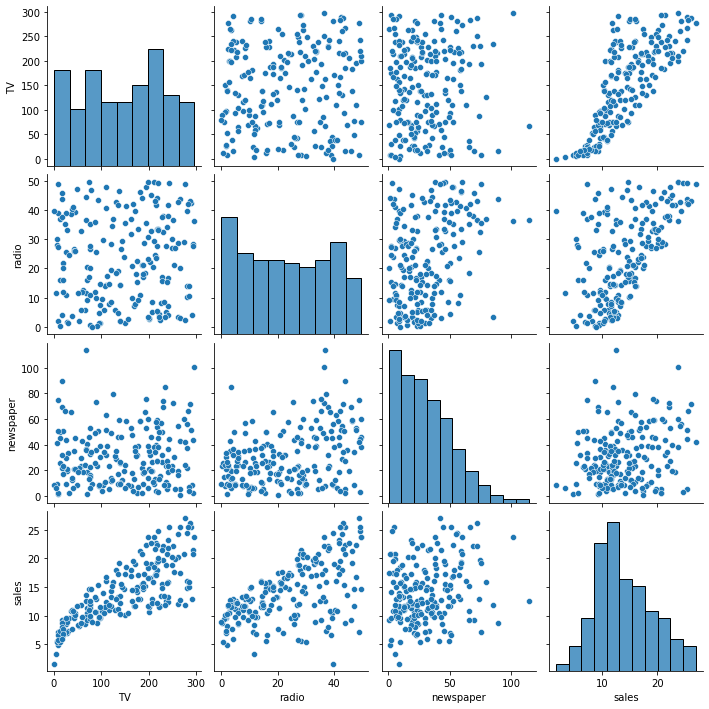

In [9]:
sns.pairplot(df);

In [ ]:
# features ile target arasındaki ilişkiye bakıyoruz.

In [10]:
df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

<AxesSubplot:>

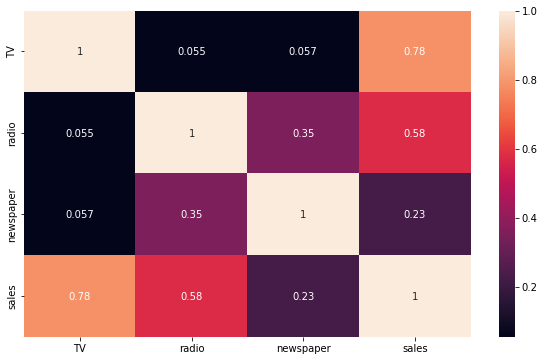

In [11]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
# target ile features ile corr uyumu varsa linearite var 
# ama genel olarak datanın linear uyumuna bakmak için ??

In [3]:
def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

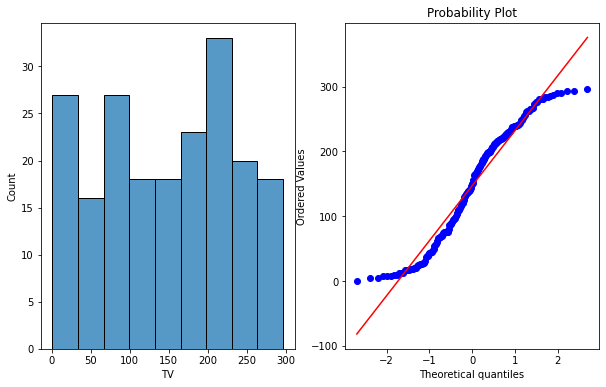

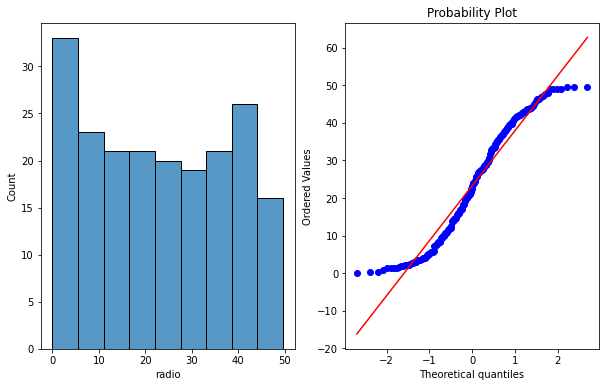

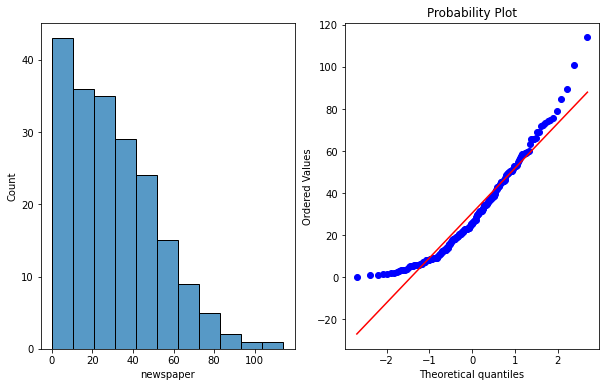

In [4]:
for col in df.drop("sales", axis=1).columns:
    check_dist(df, col)

değerlerim line etrafında bir sarmaşık gibi dolanmışsa burda normal dağılım var diyebiliriz. ama bir tarafta sapma (line'dan uzaklaşma) varsa normal dağılımdan uzaklaşmış demektir.

## Train-Test Split

In [5]:
# !pip install scikit-learn
# verilerin sayısal olduğuna emin ol. 

In [5]:
X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

# test_size = 0.3 ile datamın yüzde 30'unun test verisi olarak ayırdım.

# train setine max gözlem vermek gerek ve farklı gözlemlerle daha iyi sonuç alırız. 
# örn: sınava hazırlanan öğr farklı soru tiplerini görmesi.

# Data sayım az ise gözlem sayımı az tutarım. %20-30 arasında deneme yanılma yapıp karar verirsin.

# random_state=42 ile 42'yi kullandığım her defasında aynı train ve test datasını alacak. 
# mesela aynı datada çalışırken takım arkadaşlarınızla skorlarınızı karşılaştırabilmeniz için bunu aynı rakam girmelisin. 
# ki anlamlı bir karşılaştırma yapabilesiniz.

In [8]:
df.sample(15)

TV  radio  newspaper  sales
64   131.1   42.8       28.9   18.0
95   163.3   31.6       52.9   16.9
70   199.1   30.6       38.7   18.3
99   135.2   41.7       45.9   17.2
93   250.9   36.5       72.3   22.2
48   227.2   15.8       49.9   14.8
142  220.5   33.2       37.9   20.1
114   78.2   46.8       34.5   14.6
123  123.1   34.6       12.4   15.2
153  171.3   39.7       37.7   19.0
60    53.5    2.0       21.4    8.1
165  234.5    3.4       84.8   11.9
42   293.6   27.7        1.8   20.7
24    62.3   12.6       18.3    9.7
76    27.5    1.6       20.7    6.9

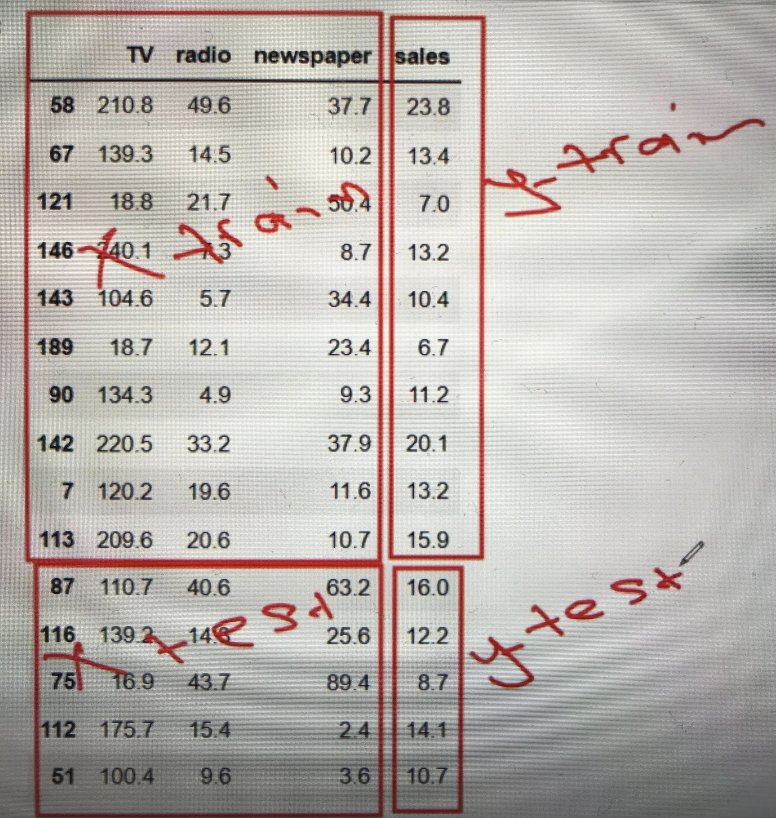

In [9]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

# modelin performansını anlamak için test datasına ihtiyacımız var.
# eğitim kısmında kuralları belirleriz train ile. Hedef koyarız. X-trainde data sayısı önemli
# Yeterli data vermelisin. 
# X-traindeki bilgilere göre x-test kendi başına tahmin alıyor. Burdan aldığım tahminlere y-pred denir.
# y-pred ile y-test ile r2 mse rmse skorlarını alacağız.
# train seti ne kadar fazla olursa o kadar iyi olur.

Train features shape :  (140, 3)
Train target shape   :  (140,)
Test features shape  :  (60, 3)
Test target shape    :  (60,)


In [10]:
X_train # shuffle default 

TV  radio  newspaper
169  284.3   10.6        6.4
97   184.9   21.0       22.0
31   112.9   17.4       38.6
12    23.8   35.1       65.9
35   290.7    4.1        8.5
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[140 rows x 3 columns]

In [11]:
X_test

TV  radio  newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3       14.2
82    75.3   20.3       32.5
68   237.4   27.5       11.0
124  229.5   32.3       74.2
16    67.8   36.6      114.0
148   38.0   40.3       11.9
93   250.9   36.5       72.3
65    69.0    9.3        0.9
60    53.5    2.0       21.4
84   213.5   43.0       33.8
67   139.3   14.5       10.2
125   87.2   11.8       25.9
132    8.4   27.2        2.1
9    199.8    2.6       21.2
18    69.2   20.5       18.3
55   198.9   49.4       60.0
75    16.9   43.7       89.4
150  280.7   13.9       37.0
104  238.2   34.3        5.3
135   48.3   47.0        8.5
137  273.7   28.9       59.7
164  117.2   14.7        5.4
76    27.5    1.6       20.7
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
195   38.2    3.7       13.8
29    70.6   16.0       40.8
19   147.3   23.9       19.1
143  104.6    5.7       34.4
86    76.3   27.5       16.0
114   78.2   46.8       34.5
173  168.4    7.1       12.8
5      8.7   48.9       75.0
126    7.8   38.9       50.6
117   76.4    0.8       14.8
73   129.4    5.7       31.3
140   73.4   17.0       12.9
98   289.7   42.3       51.2
172   19.6   20.1       17.0
96   197.6    3.5        5.9

In [12]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression() # instance oluşturuyoruz 

In [15]:
model.fit(X_train, y_train) # X_train eğitim, y_train hedef

LinearRegression()

In [24]:
y_pred = model.predict(X_test) # tahminlerde bulun bakalım ? bunun test kısmı. Eğitimi nasıl aldı ?
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [25]:
model.coef_ # tv , radio, newspaper
# değerler targeti her bir birimdeki ne kadar etkiliyor lineare özgü !!

array([0.04405928, 0.1992875 , 0.00688245])

In [26]:
model.intercept_ 

2.7089490925159048

In [27]:
# y_pred = b3 * TV + b2 * radio + b3 * newspaper + b0

In [28]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

16.565396297434837

In [29]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}
# error == Residual


In [30]:
comparing = pd.DataFrame(my_dict)
comparing

Actual       Pred  Residual
95     16.9  16.565396  0.334604
15     22.4  21.188228  1.211772
30     21.4  21.551071 -0.151071
158     7.3  10.889238 -3.589238
128    24.7  22.202320  2.497680
115    12.6  13.355569 -0.755569
69     22.3  21.196925  1.103075
170     8.4   7.350285  1.049715
174    11.5  13.275471 -1.775471
45     14.9  15.124495 -0.224495
66      9.5   9.014430  0.485570
182     8.7   6.525428  2.174572
165    11.9  14.302060 -2.402060
78      5.3   8.970260 -3.670260
186    10.3   9.456796  0.843204
177    11.7  12.004544 -0.304544
56      5.5   8.915494 -3.415494
152    16.6  16.156193  0.443807
82     11.3  10.295829  1.004171
68     18.9  18.724736  0.175264
124    19.7  19.768218 -0.068218
16     12.5  13.774690 -1.274690
148    10.9  12.496389 -1.596389
93     22.2  21.535018  0.664982
65      9.3   7.608607  1.691393
60      8.1   5.611980  2.488020
84     21.7  20.917595  0.782405
67     13.4  11.806277  1.593723
125    10.6   9.080766  1.519234
132     5.7   8.514120 -2.814120
9      10.6  12.176049 -1.576049
18     11.3   9.969194  1.330806
55     23.7  21.730090  1.969910
75      8.7  12.777706 -4.077706
150    16.1  18.101136 -2.001136
104    20.7  20.075908  0.624092
135    11.6  14.262026 -2.662026
137    20.8  20.938265 -0.138265
164    11.9  10.839388  1.060612
76      6.9   4.381906  2.518094
79     11.0   9.513324  1.486676
197    12.8  12.404863  0.395137
38     10.1  10.170454 -0.070454
24      9.7   8.090814  1.609186
122    11.6  13.163884 -1.563884
195     7.6   5.224355  2.375645
29     10.5   9.288938  1.211062
19     14.6  14.093307  0.506693
143    10.4   8.690245  1.709755
86     12.0  11.661198  0.338802
114    14.6  15.718484 -1.118484
173    11.7  11.631569  0.068431
5       7.2  13.353607 -6.153607
126     6.6  11.153147 -4.553147
117     9.4   6.336368  3.063632
73     11.0   9.761580  1.238420
140    10.9   9.419571  1.480429
98     25.4  24.255165  1.144835
172     7.6   7.695191 -0.095191
96     11.7  12.153176 -0.453176

In [31]:
result_sample = comparing.head(25)
result_sample

Actual       Pred  Residual
95     16.9  16.565396  0.334604
15     22.4  21.188228  1.211772
30     21.4  21.551071 -0.151071
158     7.3  10.889238 -3.589238
128    24.7  22.202320  2.497680
115    12.6  13.355569 -0.755569
69     22.3  21.196925  1.103075
170     8.4   7.350285  1.049715
174    11.5  13.275471 -1.775471
45     14.9  15.124495 -0.224495
66      9.5   9.014430  0.485570
182     8.7   6.525428  2.174572
165    11.9  14.302060 -2.402060
78      5.3   8.970260 -3.670260
186    10.3   9.456796  0.843204
177    11.7  12.004544 -0.304544
56      5.5   8.915494 -3.415494
152    16.6  16.156193  0.443807
82     11.3  10.295829  1.004171
68     18.9  18.724736  0.175264
124    19.7  19.768218 -0.068218
16     12.5  13.774690 -1.274690
148    10.9  12.496389 -1.596389
93     22.2  21.535018  0.664982
65      9.3   7.608607  1.691393

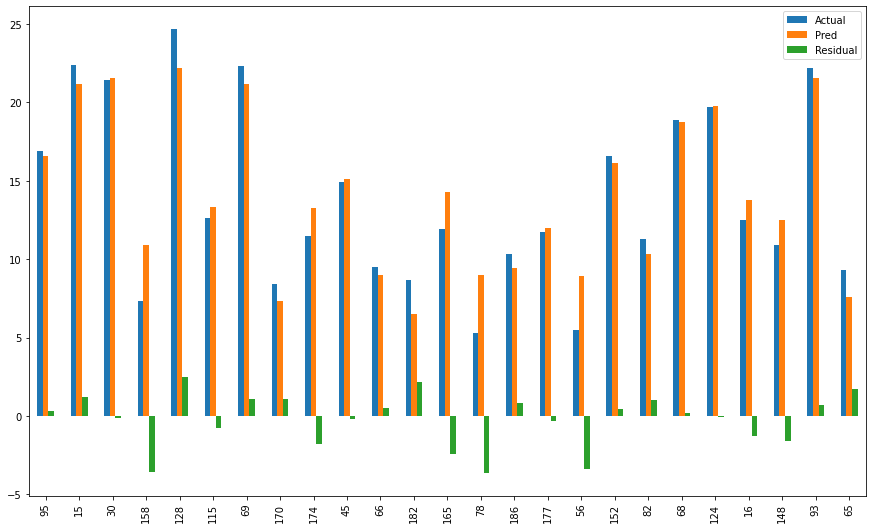

In [32]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

In [ ]:
# Skorlar bütün modeli temsil eder. %5 lik kötü tahmin olabilir. 
# Çok detay gereken durumu tahmin etmemiz mümkün olmayabilir.
# örneğin evinde altın kuvet olan birinin ev-fiyat tahmininde yanılgılar olabilir.
# resudulalr elimde olmayan bilgidir.

## Error Metrics

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # roor sqr error manuel hesaplicaz.

In [34]:
R2_score = r2_score(y_test, y_pred) # gercek, tahmin
R2_score

# R2: modelimin aciklayicilik/kapsama degeri, 
# target ı doğru tahmin için gerekli bilginin %86 ine sahibim.

0.8609466508230367

In [ ]:
# elimdeki veriler doğru tahmin yapmak için 86% oranında yeterli.

# dependent değerdeki değişikliğin % 86 sı bağımsız değişkenler ile açıklanabiliyor. 
# 86% of variance in DEPENDENT VARIABLE is explained by INDEPENDENT VARIABLE(S)

# geriye kalan %14 ü ise belirlenemeyen nedenlerden kaynaklı. adamın banyosunda altın küvet vardır evin fiyatı olması gerektiğinden fahiştir.

In [35]:
mae = mean_absolute_error(y_test, y_pred) 
mae

# mutlak değerlerini toplayıp ort alır.

1.511669222454909

In [36]:
mse = mean_squared_error(y_test, y_pred) 
mse

# resulların karesini alır toplar ve ortalmasını alır.
# bu cezalandırıyor ama target ı ele aldığı için anlamlandırmıyor.

3.7967972367152223

In [37]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

# mse açıklaması anlaşılması zor oldugu için rmse kullanırız.
# tahmin ile gerçek değer arasındaki farkı verir, ve ideal sonucu yakalamaya fırsat verir. 

# bu değerler arasında fark fazla ise modelde kötü tahminler vardır.
# residuallar içinde (hatalar) outlier değerler var demktir

1.9485372043446392

In [38]:
sales_mean = df["sales"].mean()
sales_mean

# target label ın ortalamasını alıp error ları yorumlarız.

14.022500000000003

In [39]:
mae / sales_mean
# sales ortalamam 14 idi, mae ortalamam 1.5 idi. 1.5'u 14'e bölersem 1.5'un 14'ün yüzde kaçı olduğunu bulmuş olurum.
# error un genel ortalamaya oranına bakıp error u anlamlı hale getiririz.


0.10780311802138769

In [ ]:
# target ort 14.22 model %10 civarında yanlıs tahmin yapıyor rmse ise %14 yanlıs tahmin ediyor.

In [40]:
rmse / sales_mean
# minimize etmeye gerek var. Bize ciddi hataların olup olmadığını gösteririr ve hangi modeli seçeceğimize karar verir.

0.138957903679418

Neden RMSE'yi tercih ediyoruz? Biz tahminlerle gerçek değerler arasında büyük fark varsa (Resudial'larım çok büyükse) RMSE onu büyük oranda cezalandırıyor ve büyük farklar çıkınca demiş oluyor ki senin tahminlerinde hatalar var. Biz farklı modelleri deneyeceğiz, hangisinde RMSE düşükse onu esas alacağız!



## Adjusted R2 score 
https://towardsdatascience.com/demystifying-r-squared-and-adjusted-r-squared-52903c006a60

In [111]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations-gözlem
    p = df.shape[1]-1 # number of independent variables-bağımsız değişkenler
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# dummies ile fazla feature sayısı artıtıı için r2 skoruda artar.
# gözlem sayısı artmadan feature artarsa yalancı bahar olur :D (yalancı iyileşme)
# bunu cok kullanmıcaz. ML de min gözlem ile max skoru elde etmek ?
# get dummyy satır sayısını arttırmaz.
# r2 scoru kendini bi şey sanıyo. Adjusted ile haddini bildiriyoruz yani. 

In [112]:
adj_r2(y_test, y_pred, df)

0.8588182832335933

## What is the concept of punishment for RMSE error metric?

In [41]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}

In [42]:
df_2 = pd.DataFrame(variables)
df_2

Actual  pred
0    1000  1100
1    2000  2200
2    3000  3200
3    4000  4200
4    5000  5300

In [43]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [44]:
df_2

Actual  pred  residual
0    1000  1100       100
1    2000  2200       200
2    3000  3200       200
3    4000  4200       200
4    5000  5300       300

In [45]:
#mae
df_2.residual.sum()/5 #200 
# resulları topalr / gözlem sayısı

200.0

In [46]:
#rmse
((df_2.residual**2).sum()/5)**0.5 #209.76
# resulların karesını al topla karekökünü al

209.76176963403032

## Evaluation Model

In [47]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [48]:
eval_metric(y_test, y_pred)


# modelimi test ettiğim test datamın eval metrik değelerini çıkarttım.
# RMSE değerlerden ne kadar uzak old. gösterir.

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230367
MAE 		: 1.511669222454909
MSE 		: 3.7967972367152223
RMSE 		: 1.9485372043446392


In [49]:
y_train_pred = model.predict(X_train) 

# train ve test skkorların birbirine yakın olmasını beklerim.

# skor ucurumu fazla ise ezberlemiştir overfitting. Farklı data da ciddi fark olusuyor.

In [50]:
eval_metric(y_train, y_train_pred)

# modelimi eğittiğim train datamın eval metrik değelerini çıkarttım. 
# Test datamın eval metrik değerleri ile bunu kıyaslayacağım.
# Train setinde mukemmel olup da test setinde gocmus muyum onu gormeye calisiyorum.

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072533
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


y_train skorlarının daha iyi çıkması beklenir. çünkü train yaparken bu datayı kullandığı için bu veriler üzerinde eğitim yaptığı için bu verileri gördü.

fakat ben görmediğim veriler üzerinde de modelimden iyi skorlar alabiliyorum.

burada modelimin test datası ile yaptığımda elde ettiğim skor, train data ile yaptığıma yakın olduğu için optimal bir başarıyı yakaladık diyebiliriz.

Yani test setinden aldığım değer train setinden aldığımız değeri kıyaslıyoruz. bu değerler ne kadar yakınsa modelimin başarı oranı o kadar iyidir.

Modeli değerlendiriken Test setinden aldığımız değer ile Train setinden aldığımız değerleri kıyaslıyoruz

Bu değerler birbirlerine ne kadar yakınsa (tutarlı) başarı oranı o kadar iyidir

Train setindeki scorelar genellikle daha iyi çıkar. Çünkü model bu veri üzerinde eğitiliyor.

Değerler arasında uçurumlar var ise overfitting söz konusudur.

İki skor da berbat çıkıyorsa under-fitting olma ihtimali 99%'dur.


## Is data suitable for linear regression?

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

## Plotting residuals

In [51]:
residuals = y_test-y_pred

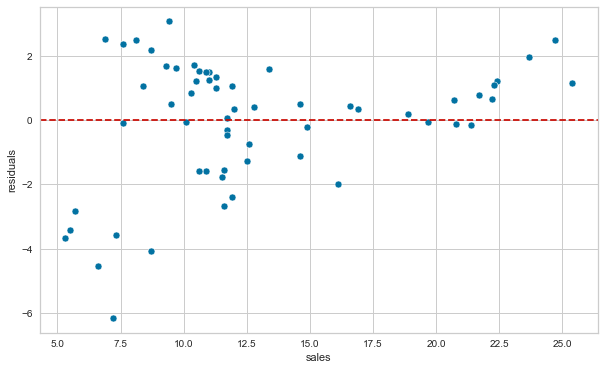

In [102]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

# x sales gercek değer y ise gercek- tahmin farkı.
# dataların random dağılıcak pattern olmayacak. 

(1)Benim residual değerlerim kırmızı çizginin etrafında ne kadar simetrik veya normal dağılmış

(2)Linearity ne kadar fazla ise veri linear modele o kadar uygundur.

(3)Datam linear e yakın ama bir nonlinearlik de hafiften var.


Benim residual değerlerim kırmızı çizginin her iki tarafında ne kadar normal dağılmışsa, çizginin altındaki değerlerler ile üstündeki değerler birbirini götürecek şekilde ise (toplamı 0 veya 0'a yakın ise)  
yani linearity ne kadar fazla ise veri linear modele o kadar uygundur


genel olarak bilmemiz gereken residual grafiğinde;

1. herhangi bir patern OLMAMALI
2. 0'ın üstüde ve altında eşit bir dağılım olmalı  --> böyle ise linear regression'a uygun bir datanız var demektir.

In [ ]:
# simetrik dağılma olmalı , pattern olmayacak. Normal dağılıma uygun olmalı.

<AxesSubplot:xlabel='sales', ylabel='Density'>

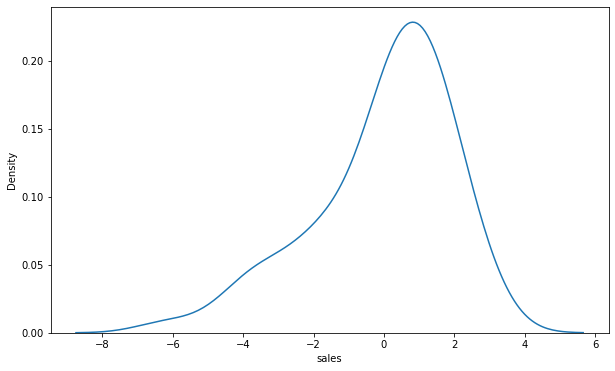

In [53]:
sns.kdeplot(residuals)

# left skewed olduğu görülüyor.

In [ ]:
# resudulların normal dağılıma uyum uymadığını kontrol ediyoruz.

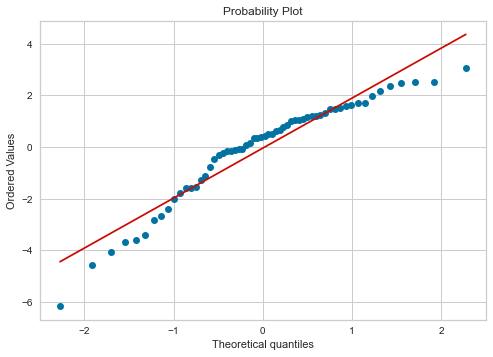

In [101]:
stats.probplot(residuals, dist ="norm", plot =plt);

# bir datanın normal dağılıma uyuyor diye kontrol ederiz.
# verilerim kırmızı çizginin etrafında sarmaşık gibi dolanıyorsa normal dağılıma yakın demektir.

lineer regression uygulayabilmemiz için kabul edilebilir skewness aralığı -1 ile +1 arasındadır.

eğer skew değerim -0.5 ile +0.5 arasında bir değerde ise ise normal dağılımdan bahsedebiliriz ve dolayısıyla lineer regression için uygundur. 

0.5 ile 1 arasında ise orta seviyede (moderate) skewness olduğunu söyleyebiliriz. bu durumda da lineer regression kullanabiliriz ama -/+ 1 den büyük ise lineer reg. uygulayamayız. 

In [55]:
from scipy.stats import skew
skew(residuals)

-0.9865673346742734

In [56]:
#pip install yellowbrick

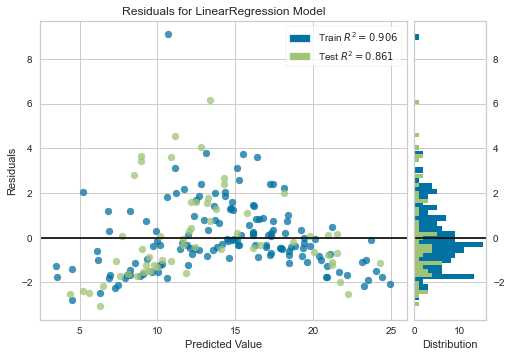

In [98]:
from yellowbrick.regressor import ResidualsPlot # görsellik için librarry

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

In [ ]:
# bazen hist. tam anlaşılmıyor.

- Hangi modelin linear Reg için daha uygun olup olmadığını anlamak için bu grafikleri tek tek çizdirmeye gerek yok.
- Diğer modeller ile kıyaslayıp karar vermemiz gerek ama interview larda sorarlarsa corr ve normal dağılıma benzerliği ile karar vermemiz gerektiğini aklımızda bulunduralım.


## Prediction Error for LinearRegression

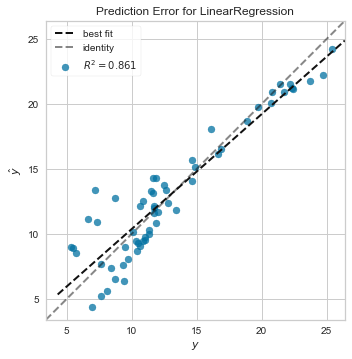

In [81]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

In [ ]:
# koyu best-line silik olan gercek değerler. ne kadar yakınlarsa o kadar başarılı olurlar.

In [ ]:
Bir DS ci hazır kodları alıp kendi notebook una uyarlaması gerektir.
Silik olan çizgi mükemmel sonuçlardır. (gerçek değerler)
Silik olmayan çizgi ise benim lineer regresyon ile aldığım best fit line dır.


## Retraining Model on Full Data

In [59]:
final_model = LinearRegression()

In [60]:
final_model.fit(X, y)

LinearRegression()

eğitimimi tamamladıktan ve model validation'u geçtikten (yani modelimden emin olduktan ve hangi modeli seçeceğime karar verdikten sonra) artık son aşamada tüm datamı kullanarak fit yapıyorum.

çünkü modelimi ne kadar büyük data ile eğitirsem  o kadar iyi sonuç alırım ( o kadar daha kesin ve sağlıklı bir predict veren modelim olur)

Hangi modeli seçmem gerektiğine karar verdikten sonra, modeli tüm data ile eğitirim. Çünkü ne kadar fazla data ile eğitirsem o kadar daha kesin ve sağlıklı bir predict yapan algoritma oluştururum.

validation'u bir önceki adımda test datam ile geçti. modelimden emin oldum ve ona karar verdim. o yüzden artık emin olduğum modelimi daha büyük data ile eğitiyorum.



Hangi modeli seçmem gerektiğine karar verdikten sonra, modeli tüm data ile eğitirim. Çünkü ne kadar fazla data ile eğitirsem o kadar daha kesin ve sağlıklı bir predict yapan algoritma oluştururum.


Eğitimimi tamamladıktan ve model validation'u geçtikten (yani modelimden emin olduktan sonra) artık son aşamada tüm datamı kullanarak fit yapıyorum. çünkü ne kadar büyük data ile fit yaparsam o kadar iyi sonuç alırım.


Modellemeyi yaparken etkilenmesin diye test ve train olarak ayiriyoruz, ama modelimize karar kilip sonuctan memnun olunca daha iyi sonuc almak icin tüm verileri kullanma adina hepsini train ediyoruz.


Hocam peki bunun dorgulugunu neye gore olcecez hepsini verdık egıttık neyle degerlendırecez?

Hocam zaten değerlendirdik. validation'u bir önceki adımda test datam ile geçti. modelimden emin oldum ve ona karar verdim. o yüzden artık emin olduğum modelimi daha büyük data ile eğitiyorum



## Coefficients

In [61]:
final_model.coef_  
# sırasıyla tv radio newspaper  katsayıları verir. 

array([ 0.04576465,  0.18853002, -0.00103749])

In [62]:
final_model.intercept_

2.9388893694594085

In [63]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [64]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [65]:
coeff_df
# coeff aynı zamanda slope, yani eğimdir.

Coefficient
TV            0.045765
radio         0.188530
newspaper    -0.001037

## Prediction on New Data

In [66]:
adv = [[150, 20, 15]]  #???

In [67]:
adv

[[150, 20, 15]]

In [68]:
final_model.predict(adv)

array([13.55862413])

In [69]:
final_model.coef_ 

# 1 birimlik artıs targette ne kadara etki ediyor katsayılarla bu etkiyi görüyoruz.

array([ 0.04576465,  0.18853002, -0.00103749])

In [70]:
final_model.intercept_

2.9388893694594085

In [71]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_

13.558624130495996

In [73]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

In [74]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [75]:
14.01627059 - 13.55862413

0.4576464599999994

Katsayı = feature daki bir birim artış, katsayı oranı kadar fark çıkarıyor. (14.01627059 - 13.55862413) = 10 * (0.045765)TV_coeff

(14.01627059 - 13.55862413) = 4.5764646 = 10 * (0.045765)

4.5764646 = 4.5764646



## The effect of features on the predicted label

In [76]:
coeff_df

Coefficient
TV            0.045765
radio         0.188530
newspaper    -0.001037

In [ ]:
df.descibe() # Scaling - ölçeklendirme 

In [ ]:
# önce datayı ölçeklendirme yaıpp hangi feature önemli hangisi önemsiz ona bakıcaz.

In [93]:
coeff_df.Coefficient * adv[0]

TV           6.864697
radio        3.770600
newspaper   -0.015562
Name: Coefficient, dtype: float64

In [79]:
6.864697 / 13.55862413

0.5062974630892729

In [80]:
3.770600 / 13.55862413

0.2780960637191142

In [83]:
-0.015562 / 13.55862413

-0.0011477565755043907

Katsayılara bakarak bir feature ın önemli olup olmadığına karar verilmez.
Khttps://www.linkedin.com/feed/update/urn:li:activity:6886767707228778496/?commentUrn=urn%3Ali%3Acomment%3A(ugcPost%3A6886767706779987969%2C6887451190330712064)atsayılara bakarak feature lar arasında bir önem derecesi yapamıyorum.
Öncelikle bu katsayıları feature değeri ile çarparak aldığım skora göre tahminleme üzerinde ne kadar etkisi varsa ona göre karar veriyorum.
Intercept i eklemeyi unutma!!! y=bo+b1 x.1+b2x2.., bo değeri
